# ST590: Project 1

### Authors: George Bridges and Ashley Ko
### Date: 2/13/2022

#### Introduction
To Do: clean up this section

For this project we utilized python to explore used motorcycle listing data obtained from [Kaggle.com](https://www.kaggle.com/nehalbirla/motorcycle-dataset?select=BIKE+DETAILS.csv). The data set, `bikeDetails.csv`, was originally complied from [BIKEWALE](www.bikewale.com). It contains 7 variables: `name` (of motorcycle), `selling_price`, `year` (of motorcycle, not sale), `seller_type` (Individual or Dealer), `owner` (1st, 2nd, 3rd, or 4th owner), `km_driven`, `ex_showroom_price`. After processing the data appropriately, we performed exploratory data analysis to summarize the data. The results of which shaped the direction of our predictions of `selling_price`. We created algorithms to predict `selling_price` using grid search, essentially a brute force approach and gradient descent, which finds the minimum value for the loss function by ascertaining where it has zero slope which indicates an extremum. Our grid search method evaluated points in the interquartile range of our target variable at intervals of $100. Thus, the estimate for the optimum value is the nearest 100 point to the actual optimum value. 

#### Exploratory Data Analysis

##### Data frame creation

To begin, we first imported the libraries necessary for accomplishing our goals of exploratory analysis and prediction. We used `pandas`, `numpy`, `math`, and `scipy.stats`.

In [4]:
#Importing pandas as pd
import pandas as pd

#Importing numpy as np
import numpy as np
                            
#Importing math
import math

#Importing scipy.stats as stats
import scipy.stats as stats

#importing matplotlib.pyplot as plt
import matplotlib.pyplot as plt

For reading in the "bikeDetails.csv", we used the pandas function `pd.read_csv` and saved the resulting data fram as "bike_data".

In [5]:
#Reading in bikeDetails data set using pandas
bike_data = pd.read_csv("bikeDetails.csv")

We used `.head()` to get a sense what the format of the data looks like.

In [6]:
#Displays the first 5 observations from the bike_data data set
bike_data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


After observing the first 5 entries of "bike_data", we felt that the variables `seller_type`, `owner`, and `year` need additional modification for us to proceed. We converted both `seller_type` and`owner` to categorical variables using `.astype()` and created a new variable `year_cat` from the `year` variable using the `pandas` function `.cut()`. This new variable segmented year into nine, 4 year levels starting with 1986 and ending with 2021.

In [7]:
#Formating seller_type as a categorical variable
bike_data.seller_type = bike_data.seller_type.astype("category")
#Formating owner as a categorical variable
bike_data.owner = bike_data.owner.astype("category")
#Creating a new variable for year as a categorical variable in ranges of four years
bike_data['year_cat'] = pd.cut(bike_data.year,
                               bins = [1986, 1990, 1994, 1998, 2002, 2006,
                                       2010, 2014, 2018, 2022],
                               right = False, include_lowest = True)

##### Numeric and Graphical Summaries

In [19]:
bike_data['year_cat'].value_counts(dropna = False)

[2014, 2018)    431
[2010, 2014)    264
[2018, 2022)    220
[2006, 2010)    105
[2002, 2006)     23
[1998, 2002)     12
[1994, 1998)      3
[1990, 1994)      2
[1986, 1990)      1
Name: year_cat, dtype: int64

As we can see the vast majority of bikes were manufactured after the year 2006 and only six bikes were manufactured before 1998.

In [20]:
bike_data['seller_type'].value_counts(dropna = False)

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

We can also see that the overwhelming majority of bike sales were completed by individuals with only six being completed by dealers.

In [21]:
bike_data['owner'].value_counts(dropna = False)

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

We see above that only four bikes are on their 4th owner and most (924) are on their 1st owner.

In [23]:
seller_year_owner = pd.crosstab([bike_data.seller_type, bike_data.year_cat],
                                bike_data.owner, margins = True, dropna = False)
seller_year_owner

owner                     1st owner  2nd owner  3rd owner  4th owner     All
seller_type year_cat                                                        
Dealer      [1986, 1990)          0          0          0          0     NaN
            [1990, 1994)          0          0          0          0     NaN
            [1994, 1998)          0          0          0          0     NaN
            [1998, 2002)          0          1          0          0     1.0
            [2002, 2006)          0          0          0          0     NaN
            [2006, 2010)          0          1          0          0     1.0
            [2010, 2014)          2          0          0          0     2.0
            [2014, 2018)          2          0          0          0     2.0
            [2018, 2022)          0          0          0          0     NaN
Individual  [1986, 1990)          1          0          0          0     1.0
            [1990, 1994)          1          1          0          0     2.0
            [1994, 1998)          2          0          1          0     3.0
            [1998, 2002)          7          1          2          1    11.0
            [2002, 2006)         17          6          0          0    23.0
            [2006, 2010)         83         17          3          1   104.0
            [2010, 2014)        220         39          3          0   262.0
            [2014, 2018)        373         53          2          1   429.0
            [2018, 2022)        216          4          0          0   220.0
All                             924        123         11          3  1061.0

Text(0.5, 1.0, 'Seller Type across Year Categories cross-referenced with Owner number')

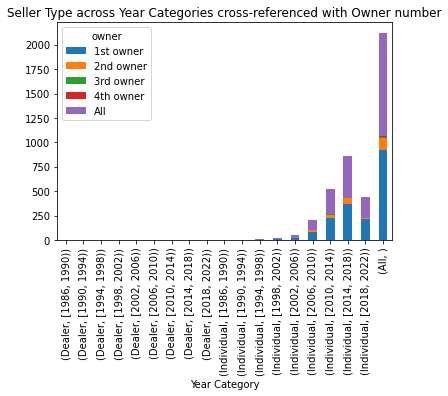

In [81]:
seller_year_owner.plot.bar(stacked = True)
plt.xlabel("Year Category")
plt.title("Seller Type across Year Categories cross-referenced with Owner number")

As we can see in the above contingency table and associated bar chart, the majority of bikes were manufactured after 2006 and are on their first owner. Interestingly all three of the bikes on their 4th owner was manufactured on or after 1998. One might think that a bike that has already changed hands that many times might have been manufactured earlier.

In [25]:
year_seller = pd.crosstab(bike_data.year_cat, bike_data.seller_type, dropna = True)
year_seller

seller_type,Dealer,Individual
year_cat,,
"[1986, 1990)",0,1
"[1990, 1994)",0,2
"[1994, 1998)",0,3
"[1998, 2002)",1,11
"[2002, 2006)",0,23
"[2006, 2010)",1,104
"[2010, 2014)",2,262
"[2014, 2018)",2,429
"[2018, 2022)",0,220


Text(0.5, 1.0, 'Breakdown of Seller Type by Year Category')

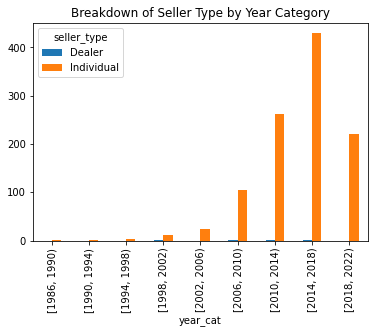

In [80]:
year_seller.plot.bar()
plt.title("Breakdown of Seller Type by Year Category")

We can see above that again most bikes were manufactured recently and the vast majority of sales happened by individuals as opposed to the only 6 involving dealers.

In [27]:
year_owner = pd.crosstab(bike_data.year_cat, bike_data.owner, dropna = True)
year_owner
#pd.crosstab(bike_data.seller_type, bike_data.owner, dropna = True)

owner,1st owner,2nd owner,3rd owner,4th owner
year_cat,,,,
"[1986, 1990)",1,0,0,0
"[1990, 1994)",1,1,0,0
"[1994, 1998)",2,0,1,0
"[1998, 2002)",7,2,2,1
"[2002, 2006)",17,6,0,0
"[2006, 2010)",83,18,3,1
"[2010, 2014)",222,39,3,0
"[2014, 2018)",375,53,2,1
"[2018, 2022)",216,4,0,0


Text(0.5, 1.0, 'Year Category by Owner')

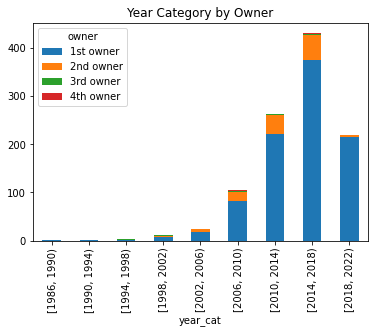

In [82]:
year_owner.plot.bar(stacked = True)
plt.title("Year Category by Owner")

In [73]:
seller_owner = pd.crosstab(bike_data.seller_type, bike_data.owner, dropna = True)
seller_owner

owner,1st owner,2nd owner,3rd owner,4th owner
seller_type,,,,
Dealer,4,2,0,0
Individual,920,121,11,3


Text(0.5, 1.0, 'Seller Type by Owner')

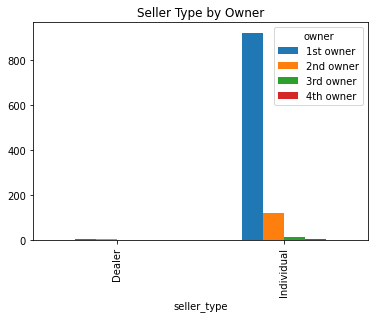

In [83]:
seller_owner.plot.bar()
plt.title("Seller Type by Owner")

Text(0.5, 1.0, 'Boxplot of Seller Price broken down by Seller Type')

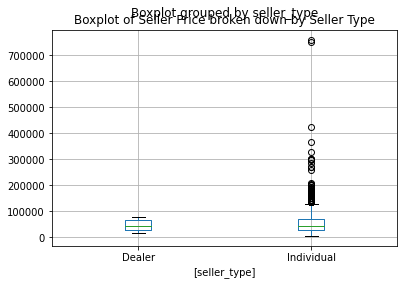

In [84]:
bike_data.boxplot(column = ['selling_price'], by = ['seller_type'])
plt.title("Boxplot of Seller Price broken down by Seller Type")

You can see the range is larger for individuals, reflective in part of how many more data points there are for Individuals.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, '[1986, 1990)'),
  Text(2, 0, '[1990, 1994)'),
  Text(3, 0, '[1994, 1998)'),
  Text(4, 0, '[1998, 2002)'),
  Text(5, 0, '[2002, 2006)'),
  Text(6, 0, '[2006, 2010)'),
  Text(7, 0, '[2010, 2014)'),
  Text(8, 0, '[2014, 2018)'),
  Text(9, 0, '[2018, 2022)')])

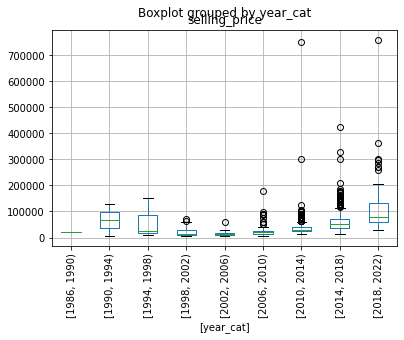

In [79]:
bike_data.boxplot(column = ['selling_price'], by = ['year_cat'])
plt.xticks(rotation = 90)

We can see that most bikes were manufactured recently and are on their first owner. A substantial amount are on their second owner with only a few on their third and fourth owners.

In [29]:
pd.pivot_table(bike_data, values = ["selling_price", "ex_showroom_price", "km_driven"],
               index = ["seller_type"], aggfunc = ("min", "max", "mean", "std")).round(2)

ex_showroom_price                              km_driven  \
                          max      mean      min       std       max   
seller_type                                                            
Dealer               118997.0  88536.00  61600.0  28860.41    100000   
Individual          1278000.0  87955.93  30490.0  77666.00    880000   

                                      selling_price                             
                 mean   min       std           max      mean    min       std  
seller_type                                                                     
Dealer       35258.83  5500  37470.92         80000  46666.67  15000  25734.54  
Individual   34354.72   350  51705.46        760000  59711.92   5000  56427.96

We see above that the mean ex_showroom_price is very similar between Dealers and Individuals, while the minimum is quite a bit lower for Individuals. Also note that the standard deviation on Individual ex_showroom_price is more than twice as high as as it is for Dealers, therefore the spread of the data representing ex_showroom_price is much larger for Individuals. This trend regarding standard deviation also holds for km_driven and selling-price as well - the spread of the data is larger for Individuals.

In [30]:
pd.pivot_table(bike_data, values = ["selling_price", "ex_showroom_price", "km_driven"],
               index = ["owner"], aggfunc = ("min", "max", "mean", "std")).round(2)

ex_showroom_price                                 km_driven  \
                        max       mean       min        std       max   
owner                                                                   
1st owner          752020.0   84362.80   30490.0   54520.04    646000   
2nd owner         1278000.0  112554.65   42859.0  168949.65    340000   
3rd owner           84751.0   64611.00   44493.0   20129.01     70000   
4th owner          534000.0  534000.00  534000.0        NaN    880000   

                                      selling_price                    \
                mean   min        std           max       mean    min   
owner                                                                   
1st owner   32816.58   350   45870.37        760000   60022.81   5000   
2nd owner   39288.99  3500   35886.63        750000   55666.66   6000   
3rd owner   33292.18  5000   20934.50        150000   55727.27  20000   
4th owner  311500.00  6500  492772.51        330000  118333.33  10000   

                      
                 std  
owner                 
1st owner   51542.57  
2nd owner   81671.92  
3rd owner   38385.13  
4th owner  183325.76

In [31]:
pd.pivot_table(bike_data, values = ["selling_price", "ex_showroom_price", "km_driven"],
               index = ["year_cat"], aggfunc = ("min", "max", "mean", "std")).round(2)

ex_showroom_price                                km_driven  \
                           max       mean      min        std       max   
year_cat                                                                  
[1986, 1990)               NaN        NaN      NaN        NaN     21000   
[1990, 1994)               NaN        NaN      NaN        NaN     35000   
[1994, 1998)               NaN        NaN      NaN        NaN    646000   
[1998, 2002)           54852.0   54852.00  54852.0        NaN     65000   
[2002, 2006)           54852.0   54852.00  54852.0       0.00    127000   
[2006, 2010)           85011.0   63979.61  42859.0   15628.84    880000   
[2010, 2014)         1278000.0   83425.72  37675.0  111236.26    500000   
[2014, 2018)          599000.0   85457.47  30490.0   57805.32    450000   
[2018, 2022)          752020.0  106332.10  48000.0   78601.96     70000   

                                          selling_price                    \
                   mean    min        std           max       mean    min   
year_cat                                                                    
[1986, 1990)   21000.00  21000        NaN         20000   20000.00  20000   
[1990, 1994)   22500.00  10000   17677.67        130000   68000.00   6000   
[1994, 1998)  237118.00  20000  354329.05        150000   61666.67  10000   
[1998, 2002)   35291.67   4000   22949.01         70000   25416.67   5000   
[2002, 2006)   48774.61  11000   29961.34         59000   16660.87   7500   
[2006, 2010)   64704.50   3500   99343.35        180000   26420.00   6000   
[2010, 2014)   45209.90   1900   50123.60        750000   39083.28  12000   
[2014, 2018)   29615.22   1200   32691.25        425000   62245.90  15000   
[2018, 2022)   11998.03    350   10715.46        760000  101485.49  30000   

                        
                   std  
year_cat                
[1986, 1990)       NaN  
[1990, 1994)  87681.24  
[1994, 1998)  76865.68  
[1998, 2002)  24257.93  
[2002, 2006)  10793.30  
[2006, 2010)  22912.10  
[2010, 2014)  50548.88  
[2014, 2018)  42670.33  
[2018, 2022)  72415.92

array([[<AxesSubplot:xlabel='selling_price', ylabel='selling_price'>,
        <AxesSubplot:xlabel='year', ylabel='selling_price'>,
        <AxesSubplot:xlabel='km_driven', ylabel='selling_price'>,
        <AxesSubplot:xlabel='ex_showroom_price', ylabel='selling_price'>],
       [<AxesSubplot:xlabel='selling_price', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='km_driven', ylabel='year'>,
        <AxesSubplot:xlabel='ex_showroom_price', ylabel='year'>],
       [<AxesSubplot:xlabel='selling_price', ylabel='km_driven'>,
        <AxesSubplot:xlabel='year', ylabel='km_driven'>,
        <AxesSubplot:xlabel='km_driven', ylabel='km_driven'>,
        <AxesSubplot:xlabel='ex_showroom_price', ylabel='km_driven'>],
       [<AxesSubplot:xlabel='selling_price', ylabel='ex_showroom_price'>,
        <AxesSubplot:xlabel='year', ylabel='ex_showroom_price'>,
        <AxesSubplot:xlabel='km_driven', ylabel='ex_showroom_price'>,
        <AxesSubplot:xlabel

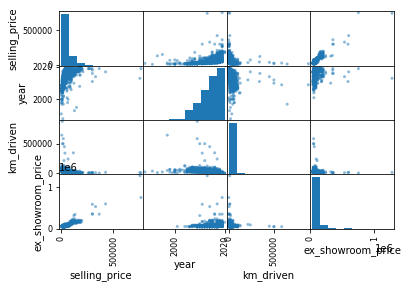

In [33]:
pd.plotting.scatter_matrix(bike_data)

In [34]:
#using the .describe() method to get a first look at the numeric variables
#in the dataset. Although you would not necessarily perform math on the listed 
#years for each bike, seeing info like the average year is meaningful.
bike_data.describe().round(2)

,selling_price,year,km_driven,ex_showroom_price
count,1061.00,1061.00,1061.00,626.00
mean,59638.15,2013.87,34359.83,87958.71
std,56304.29,4.30,51623.15,77496.59
min,5000.00,1988.00,350.00,30490.00
25%,28000.00,2011.00,13500.00,54852.00
50%,45000.00,2015.00,25000.00,72752.50
75%,70000.00,2017.00,43000.00,87031.50
max,760000.00,2020.00,880000.00,1278000.00


In [43]:
bike_data.columns
#note: our columns are name, selling_price, year,
#seller_type, owner, km_driven, and ex_showroom_price

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'year_cat'],
      dtype='object')

In [44]:
#bike_data_numeric = bike_data['selling_price', 'km_driven', 'ex_showrooom_price']

#previously I tried to do what I was doing above exactly in the way he does it
#in the video and got the same error

#Fixed to grab desired columns from bike_data for all rows
bike_data_numeric = bike_data.loc[:, ['selling_price', 'year', 'km_driven', 'ex_showroom_price']]


In [52]:
#interquartile range for selling_price
q1 = bike_data.selling_price.quantile(q = [.25])
q3 = bike_data.selling_price.quantile(q = [.75])
IQR_selling_price = q3[.75] - q1[.25]
IQR_selling_price

42000.0

In [55]:
#finding correlation between the numeric variables in the data set
bike_data_numeric.corr().round(3)

,selling_price,year,km_driven,ex_showroom_price
selling_price,1.000,0.402,-0.213,0.919
year,0.402,1.000,-0.289,0.126
km_driven,-0.213,-0.289,1.000,-0.122
ex_showroom_price,0.919,0.126,-0.122,1.000


We see that selling_price and ex_showroom_price are highly correlated, in fact even more highly correlated than I anticipated or what it looked like from a cursory look at the data. They in fact boast a roughly 92% correlation with one another. Also, selling_price and km_driven are negatively correlated as one would expect (the more use a vehicle has the lower the price all else being equal). Insofar as it is meaningful the positive correlation shown between year and selling_price also makes sense because a larger number for year represents a newer vehicle. One might expect that until a bike is so old as to be considered a collector's item or an antique that an older bike would be worth less.

In [56]:
bike_data.drop(["year"], axis = 1).groupby("seller_type").mean().round(2)

,selling_price,km_driven,ex_showroom_price
seller_type,,,
Dealer,46666.67,35258.83,88536.00
Individual,59711.92,34354.72,87955.93


In [57]:
bike_data.drop(["year"], axis = 1).groupby("owner").mean().round(2)

,selling_price,km_driven,ex_showroom_price
owner,,,
1st owner,60022.81,32816.58,84362.80
2nd owner,55666.66,39288.99,112554.65
3rd owner,55727.27,33292.18,64611.00
4th owner,118333.33,311500.00,534000.00


We can see that dealers tend to sell their bikes for about 13,000 dollars less than individuals do as well as sell slightly older bikes that have been ridden a little farther. Very interestingly, in the second set of grouped means we see that by far the most lucrative sales occur by the 4th owner. Intuitively one might expect a bike that has been sold at least three times before might be worth less, but that is clearly not the case. This owner status, particularly in the case of "4th owner" could be a powerful predictive attribute.

In [58]:
bike_data.drop(["year"], axis = 1).groupby("year_cat").mean().round(2)

,selling_price,km_driven,ex_showroom_price
year_cat,,,
"[1986, 1990)",20000.00,21000.00,NaN
"[1990, 1994)",68000.00,22500.00,NaN
"[1994, 1998)",61666.67,237118.00,NaN
"[1998, 2002)",25416.67,35291.67,54852.00
"[2002, 2006)",16660.87,48774.61,54852.00
"[2006, 2010)",26420.00,64704.50,63979.61
"[2010, 2014)",39083.28,45209.90,83425.72
"[2014, 2018)",62245.90,29615.22,85457.47
"[2018, 2022)",101485.49,11998.03,106332.10


#### Prediction of Selling Price

Using our findings from the our exploratory data analysis, we set forth to create algorithms for predicting the selling_price of a motorcycle. We quantified the quality of our prediction through a loss function. Our primary metric was Root Mean Square Error or RMSE. We took two different approaches to optimizing our predictions grid search and gradient descent.

##### Grid Search Algorithm

In this section we implemented a grid search to find the optimal constant to minimize RMSE. To do this, we created a grid of potential constant or *c* values as and calculated the resulting RMSE. The constant value that resulted in the lowest RMSE was selected as our optimal value and used for prediction. RMSE was reduced using both a one-dimensional grid of constant values and a two-dimensional grid of intercept (b0) and slope values (b0).

After selecting the grid values, both the one-dimensional grid and two-dimensional grid were processed by generating an RMSE value for the candidate constant or slope and intercept terms. This RMSE was then compared with conditional logic to select the optimal candidate *c* or *b0* and *b1* values.

**For Predictions based on just a y, response variable, and a constant, c:**
The candidate *c* values were generated from the IQR of the supplied response variable. Values were incremented by 100 from the 25th quantile to the 75th quantile. We believed IQR was an acceptable basis for generating *c* values as it represents the central 50% of the data. The increments of 100 allow for reasonably small changes between values in `selling_price` while maintaining a finite amount of potential constants. As our algorithm can also be used to predict `km_driven`, we felt that increments of 100 applied well to both scenarios.

In [1]:
#Generates constant values for a given response variable
def get_c_vals(y): 
    """
    Generate a series of c values for the response variable y
    y is aassumed to be a numpy array (1D) or Pandas series
    Data is assumed to have no missing values
    """
    #Calculating 25th and 75th quantiles
    q1 = bike_data.selling_price.quantile(q = [.25])
    q3 = bike_data.selling_price.quantile(q = [.75])
    #Creating a series of values from the response IQR in increments of 100
    c = pd.Series(range(int(q1[0.25]),int(q3[0.75]+1),100))
    #Returning constant grid
    return c

#Calculates RMSE for a response variable and supplied constant
def get_rmse_y(y, c):
    """
    Computes RMSE
    y is assumed to be a numpy array (1D) or Pandas series
    c is assumed to be an integer or float
    Data is assumed to have no missing values
    """
    sums = 0
    #Loops through all values of why to calculate square error loss
    for i in range(0, len(y)):
        sums += (y[i] - c)**2
    #Returns RMSE
    return math.sqrt((1/len(y))*sums)


#Creating variables for conditional logic
best_c = small_e = float(1000000)

#Searches grid of all candidate values calculate RMSE
#Returns constant value with lowest RMSE as prediction
def grid_search_y(y):
    """
    Calculates best prediction value with lowest RMSE
    y is assumed to be a numpy arrays (1D) or Pandas series
    Data is assumed to have no missing values
    """
    c = get_c_vals(y)
    global small_e
    global best_c
    for i in range(0, len(c)):
        e = get_rmse_y(y, c[i])
        if e < small_e:
            small_e = e
            best_c = c[i]
        else:
            continue
    return best_c

In [26]:
#Calls the grid search algorithm for response variable selling price
optimal_pred_sp = grid_search_y(bike_data.selling_price)
print("The optimal prediction for selling price is", optimal_pred_sp,
      "with an RMSE of", round(small_e,3),
      ". The mean value for this variable is $",
      round(bike_data.selling_price.mean(), 2))

The optimal prediction for selling price is 34400 with an RMSE of 54987.079 . The mean value for this variable is $ 59638.15


In [28]:
optimal_pred_km = grid_search_y(bike_data.km_driven)
print("The optimal prediction for kilometers driven is", optimal_pred_km,
      "with an RMSE of ", round(small_e,3),
      ". The mean value for this variable is",
      round(bike_data.km_driven.mean(), 2), "km driven.")

The optimal prediction for kilometers driven is 34400 with an RMSE of  51598.835 . The mean value for this variable is 34359.83 km driven.


As you can see from the printed statements above the grid search for just a response variable, y, produces a prediction and RMSE.

**For predictions based on y, a response variable, and x, a predictor variable:**
Candidate values for this method are intercept, *b0*, and slope, *b1* values. This suggested to us that using simple linear regression estimates for these values could be beneficial when building our two-dimensional grid. As with the *c* values, we selected to represent our candidate values by using something similar to the IQR for each metric.

Our algorithm takes in response and predictor variables to obtain mean and standard error values for *b0* and *b1* estimates. This allows for the grid ranges to capture the approximate IQR. As `selling_price` is our response variable of interest we modified these ranges to fit incompass a wide range of values. For illustrative purposes, we isolated the code for computing quantiles for both *b0* and *b1*. We applied a simplistic mean +/- 2 * sd approach to find these quantiles.

In [9]:
#Creates a linear regression model for finding b0 and b1 values
slr = stats.linregress(bike_data.km_driven, bike_data.selling_price)
b0_q1 = slr.intercept - 2*slr.intercept_stderr
b0_q3 = slr.intercept + 2*slr.intercept_stderr
b1_q1 = slr.slope - 2*slr.stderr
b1_q3 = slr.slope + 2*slr.stderr
print("For linear regression of selling_price as a response and km_driven",
      "as the predictor, the quantiles for the intercept are", round(b0_q1, 4),
      "(25th) and", round(b0_q3, 4), "(75th). The quantiles for the slope are",
      round(b1_q1, 4), "(25th) and ", round(b1_q3, 4), "(75th).") 

For linear regression of selling_price as a response and km_driven as the predictor, the quantiles for the intercept are 63557.9403 (25th) and 71678.204 (75th). The quantiles for the slope are -0.2977 (25th) and  -0.1668 (75th).


Given the results above, we selected to approximate the IQR for intercept by subtracting 50 from the lower bound and adding 100 to the upper bound while incrementing in steps of 50. This allowed for us to capture both the 25th and 75th quartiles in our grid. For the slope values, we had coded a range of -0.3 to -0.1 in increments of 0.0001. This allowed for us to include both tails of the range with small step changes.

In [10]:
#Function to generate b0 and b1 values
def get_beta_vals(y, x): 
    """
    Creates a data frame of beta values
    y and x are assumed to be numpy arrays (1D) or Pandas series
    Data is assumed to have no missing values
    """
    #Use linear regression to estimate b0 and b1 for grid values
    slr = stats.linregress(x, y)
    b0_q1 = slr.intercept - 2*slr.intercept_stderr
    b0_q3 = slr.intercept + 2*slr.intercept_stderr
    b1_q1 = slr.slope - 2*slr.stderr
    b1_q3 = slr.slope + 2*slr.stderr
    b0 = pd.Series(np.arange((int(b0_q1) - 50), (int(b0_q3)+100), 50))
    b1 = pd.Series(np.arange(-.3, -.1, 0.001))
    #Creates a dataframe from the b0 and b1 series
    betas = pd.DataFrame(zip(b0, b1), columns = ["b0", "b1"])
    #Returns two dimensional dataframe
    return betas

#Takes in a response and predictor variable as well as a grid
#for b0 and a grid for b1
def rmse_yx(y, x, b0, b1):
    """
    Computes RMSE
    y, x, b0, and b1 are assumed to be numpy arrays (1D) or Pandas series
    Data is assumed to have no missing values
    """
    #Combines squared error loss with RMSE
    sums = 0
    for i in range(0,len(y)):
        sums += (y[i] - (b0 + b1 * x[i]))**2
    rmse = math.sqrt(1/(len(y)) * sums)
    return rmse
            
#RMSE place holder object for conditional logic
small_e = float(1000000)

#Primary alogorithm to implement grid search
#Loop to apply the RMSE all values of b0 and b1
def grid_search_yx(y, x):
    """
    Generates RMSE value and selects the best b0 and b1 values
    y, x, b0, and b1 are assumed to be numpy arrays (1D) or Pandas series
    Data is assumed to have no missing values
    """
    betas = get_beta_vals(y, x)
    b0 = betas["b0"]
    b1 = betas["b1"]
    #RMSE
    global small_e
    #Best b0
    global best_b0
    #Best b1
    global best_b1
    for i in range(0,len(b0)):
        for j in range(0,len(b1)):
            e = rmse_yx(y, x, float(b0[i]), (b1[j]))
            if e < small_e:
                small_e = e
                best_b0 = b0[i]
                best_b1 = b1[j]
            else:
                continue

#Helper function to generate yhat from optimal values of b0, b1, and
#the predictor variable
def get_prediction_xy(x):
    return best_b0 + best_b1*x

The step below calls the grid search function to select optimal *b0* and *b1* values for the given response and predictor variables.

In [11]:
#Calls the grid search to calculate optimal b0 and b1 values
grid_search_yx(bike_data.selling_price, bike_data.km_driven)

In [12]:
print("The optimal b0 value for predicting selling price from km driven is",
     round(best_b0, 3), "and the optimal b1 value is", round(best_b1, 4), ".")

The optimal b0 value for predicting selling price from km driven is 67607 and the optimal b1 value is -0.232 .


Using these optimal combinates of *b0* and *b1* we have calculated predictions for `selling_price` at 10000, 25000, and 35000 `km_driven`.

In [13]:
#Calls the prediction function for the desired x values
a = get_prediction_xy(10000)
b = get_prediction_xy(25000)
c = get_prediction_xy(35000)

In [14]:
print("Grid search predictions: The predicted selling price for a motorcycle with 10,000 km driven is",
      round(a,2), ". The predicted selling price for a motorcycle with 25,000 km driven is,",
      round(b,2), ". The predicted selling price for a motorcycle with 35,000 km driven is",
      round(c,2), ".")

Grid search predictions: The predicted selling price for a motorcycle with 10,000 km driven is 65287.0 . The predicted selling price for a motorcycle with 25,000 km driven is, 61807.0 . The predicted selling price for a motorcycle with 35,000 km driven is 59487.0 .


##### Gradient Descent Algorithm

The general process of gradient descent is to apply calculus principals to approximate the average rate of change and select the values which minimize this rate. We start with initial guesses for our slope and intercept values and then update guesses based on a step size. This updated slope and intercept values are compared to the initial guesses for these values. If the distance between the original values and the new values is within a tolerance level, the new values are considered optimal. However, if if the new values are outside this range, the search continues.

As with the previous algorithms for grid search, we separated gradient descent into two algorithms. The first is gradient descent just using a response variable or y, (`selling_price`) and the second is using both a response variable and predictor variable or x, (`km_driven`).

**Gradient descent algorithm for just y:** Similar to the grid search for y alone, the response variable will be predicted using a constant *c* value. The starting guess for *c* was set at the mean of the response variable. The response variable is `selling_price` and it's mean is $59638.15. A tolerance level of 0.001 was selected to assess the optimal nature of generated *c* values.

In [15]:
#Creates a squared error loss
def get_sq_e_loss(y, c):
    """
    Generates squared error loss
    y, c are assumed to be integers or floats
    """
    return (y - c)**2

#Creates an RMSE value
def get_rmse(y, c):
    """
    Generates RMSE
    y is assumed to be a numpy array (1D) or Pandas series
    c is assumed to be an integers or float
    Data is assumed to have no missing values
    """
    sums = 0
    #Loops through all values of y and sums squared error loss
    for i in range(0, len(y)):
        sums += get_sq_e_loss(y[i], c)
    #Returns RMSE
    return math.sqrt((1/len(y))*sums)

#Creates a difference quotient
def get_dif_q(c, delta, y):
    """
    Produces a difference qutient
    y and c are assumed to be numpy arrays (1D) or Pandas series
    delta is assumed to be an integers or float
    Data is assumed to have no missing values
    """
    #Numerator
    a = get_rmse(y, (c+delta))
    #Denominator
    b = get_rmse(y, c)
    return (a - b)/delta

#Finds optimal value of c for given response variable
def get_grad_desc(y):
    """
    Produces a gradient descent for y
    y is assumed to be a numpy array (1D) or Pandas series
    Data is assumed to have no missing values
    """

    #Tolerance level
    num_tol = 0.001
    #Sets start current c value
    cur_c = y.mean()
    #Initiates attempt count for shut off element
    attempt = 1
    
    #Loop which performs grad desc for 1000 iterations
    while attempt < 1001:
        #Calls differenc quotion function
        diff_quotient = get_dif_q(cur_c, 0.01, y)
        #Step 6.
        new_c = cur_c - diff_quotient * -0.01
        #Tests new c against current c
        if abs(new_c - cur_c) < num_tol:
            cur_c = new_c
            attempt = 1001
        #Continues loop otherwise
        else:
            cur_c = new_c
            attempt += 1
    #Stores optimal as a prediction
    prediction = cur_c
    #Returns the optimal value
    return prediction

Below we have two calls to the gradient descent for just y alone. The first call is to predict `selling_price` and the second predicts `km_driven`.

In [18]:
#Reports prediction for selling_price using optimal c value
pred_sp = get_grad_desc(bike_data.selling_price)
#Demonstrates generalization of algorithm
pred_km = get_grad_desc(bike_data.km_driven)  
print("For gradient descent, the prediction for selling price is",
      round(pred_sp, 2), " and the prediction for km driven is",
      round(pred_km,2), ".")

For gradient descent, the prediction for selling price is 59638.15  and the prediction for km driven is 34359.83 .


**Gradient descent algorithm for y and x:** This algorithm uses a response variable and a predictor variable to find optimal estimates for *b0* and *b1*. The process is similar to the gradient descent algorithm for a single variable in that it optimizes for values based on a threshold. The threshold for this algorithm is euclidean distance between the new vector and the previous vector. After some trial and error, we selected a starting estimate of *b0* to be the mean of `selling_price` and *b1* to be 0.0001. This is based on the previously described linear regression model values. Given the magnitude of these starting estimates, we selected a step size for *b0* to be 10 and *b1* to be 0.000001. The delta values for *b0* and *b1* were selected to be 0.001 and 0.0001, respectively. The choice of step size and delta value were chosen to produce final results that closely mirrored our previous expectations.

In [20]:
#Squared error loss function
def get_sq_e_loss_yx(y, x, b0, b1):
    """
    Generates squared error loss
    y, x, b0, b1 are assumed to be integers or floats
    """
    return (y - b0 - b1*x)**2

#RMSE function
def get_rmse_yx(y, x, b0, b1):
    """
    Generates RMSE
    b0, b1 are assumed to be integers or floats
    y, x assumed to be a numpy arrays (1D) or Pandas series
    Data is assumed to have no missing values
    """
    sums = 0
    #Loops over all pairs of y and x to generate RMSE
    #for the given b0 and b1 values
    for i in range(0, len(y)):
        sums += get_sq_e_loss_yx(y[i], x[i], b0, b1)
    return math.sqrt((1/len(y))*sums)

#Difference quotient function for b0
def get_dif_q_b0(y, x, b0, delta0, b1):
    """
    Generates difference quotion for b0
    b0, delta0, b1 are assumed to be integers or floats
    y, x assumed to be a numpy arrays (1D) or Pandas series
    Data is assumed to have no missing values
    """
    #Numerator
    a = get_rmse_yx(y, x, (b0+delta0), b1)
    #Denominator
    b = get_rmse_yx(y, x, b0, b1)
    return (a - b)/delta0

#Difference quotient function for b1
def get_dif_q_b1(y, x, b0, delta1, b1):
    """
    Generates difference quotion for b1
    b0, delta1, b1 are assumed to be integers or floats
    y, x assumed to be a numpy arrays (1D) or Pandas series
    Data is assumed to have no missing values
    """
    #Numerator
    a = get_rmse_yx(y, x, b0, (b1+delta1))
    #Denominator
    b = get_rmse_yx(y, x, b0, b1)
    return (a - b)/delta1

#Gradient descent function for y and x  
def get_grad_desc_yx(y, x):
    """
    Generates gradient descent
    y, x assumed to be a numpy arrays (1D) or Pandas series
    Data is assumed to have no missing values
    """
    
    #Picking starting values b0
    global est_b0 
    est_b0 = y.mean()
    cur_b0 = est_b0 
    
    #Step 6. Picking starting values for b1
    global est_b1
    est_b1 = 0.0001
    cur_b1 = est_b1
    
    #Setting step size for b0
    step_size_b0 = 10
    #Setting step size for b1
    step_size_b1 = 0.000001
    
    #Euclidean distance tolerance level
    dist_tol = 0.1
    
    #Attempt counter for shut off of loop
    attempt = 1
    
    #Loops to find optimal b0 and b1 for 1000 iterations
    while attempt < 1001:
        #Calls difference quotient function for b0 
        diff_quotient_b0 = get_dif_q_b0(y, x, cur_b0, 0.001, cur_b1)
        #Creates new b0
        new_b0 = cur_b0 - diff_quotient_b0 * (-step_size_b0)
        
        
        #Calls difference quotient function for b1
        diff_quotient_b1 = get_dif_q_b1(y, x, cur_b0, 0.0001, cur_b1)
        #Creates new b1
        new_b1 = cur_b1 - diff_quotient_b1 * (-step_size_b1)
        
        #Calculating euclidean distance
        point1 = np.array((cur_b0, cur_b1))
        point2 = np.array((new_b0, new_b1))
        dist = np.linalg.norm(point1 - point2)
        
        #Checking to see if distance is within tolerance range
        if dist < dist_tol:
            cur_b0 = new_b0
            cur_b1 = new_b1
            attempt = 1001
        else:
            cur_b0 = new_b0
            cur_b1 = new_b1
            attempt += 1

    #Setting optimal b0 and b1 values
    est_b0 = cur_b0
    est_b1 = cur_b1

The function below returns a predicted selling price when supplied km driven.

In [22]:
#Helper function to generate yhat from optimal values of b0, b1, and
#the predictor variable
def get_grad_pred(x):
    """
    Creates gradient descent prediction
    x is assumed to be a numpy array or Pandas series
    Data assumed to contain no missing values
    """
    return est_b0 + est_b1*x

The code below calls the two variable gradient descent for `selling_price` and `km_driven` to provide optimal estimates of *b0* and *b1*.

In [23]:
#Calls gradient descent function
get_grad_desc_yx(bike_data.selling_price, bike_data.km_driven)
print("The optimal b0 value as calculated by the gradient descent algorithm is",
     est_b0, "and the optimal b1 value is", round(est_b1, 4), ".")

The optimal b0 value as calculated by the gradient descent algorithm is 59638.15235365436 and the optimal b1 value is 0.0111 .


In [24]:
#Predictions
a = get_grad_pred(10000)
b = get_grad_pred(25000)
c = get_grad_pred(35000)

In [25]:
print("Gradient descent predictions: The predicted selling price for a motorcycle with 10,000 km driven is",
      round(a,2), ". The predicted selling price for a motorcycle with 25,000 km driven is,",
      round(b,2), ". The predicted selling price for a motorcycle with 35,000 km driven is",
      round(c,2), ".")

Gradient descent predictions: The predicted selling price for a motorcycle with 10,000 km driven is 59749.12 . The predicted selling price for a motorcycle with 25,000 km driven is, 59915.58 . The predicted selling price for a motorcycle with 35,000 km driven is 60026.55 .


#### Conclusion

As one might expect, motorcycle selling price appears to decrease with an increase in kilometers driven. However, best on our exploratory analysis there is a weakly negative correlation, -0.213, between selling price and kilometers driven. By the correlations table results and graphical summaries, it appears that expected show room price is more highly correlated to selling price. These two variables have a correlation 0.919.

The strength of the correlation between selling price and km driven was evident in the prediction results. For both grid and gradient algorithms, the intercept value contributed to a large portion of selling price than did km driven.

In comparing the the prediction methods we notice, that grid search predictions were typically higher than gradient descent predictions. The grid search predicted selling price for a motorcycle with 10,000 km driven was 65287.0. The predicted selling price for a motorcycle with 25,000 km driven was 61807.00. The predicted selling price for a motorcycle with 35,000 km driven was 59487.00. That is compared to the gradient descent predicted values of 59749.12, 59915.58, 60026.55 for 10k, 25k, and 35k km driven, respectively. Interestingly, the gradient descent method produced a higher predicted value for a motorcycle with 35,000 km driven than the lower kilometers driven.

It is possible our selection of step size, delta, and starting values caused our gradient descent to produces less variable predictions for three vastly different km driven values. It is also likely, that lack of variation in gradient values and difference between grid search and gradient values is because of the weak correlation between the response and predictor variables.